<a href="https://colab.research.google.com/github/yeiniz/yein/blob/main/%5B%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%EB%B0%8F%ED%99%9C%EC%9A%A9%5D_6_%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80%EC%8B%AC%ED%99%94_%2B_%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1%ED%9A%8C%EA%B7%80_(%EB%B6%84%EB%A5%98)_%EB%AC%B8%EC%A0%9C_%ED%8F%89%EA%B0%80_%EB%B0%A9%EB%B2%95_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**사이킷런 (scikit-learn)** : 대표적인 머신러닝 라이브러리
- 사이킷런의 대표적인 선형회귀 관련함수

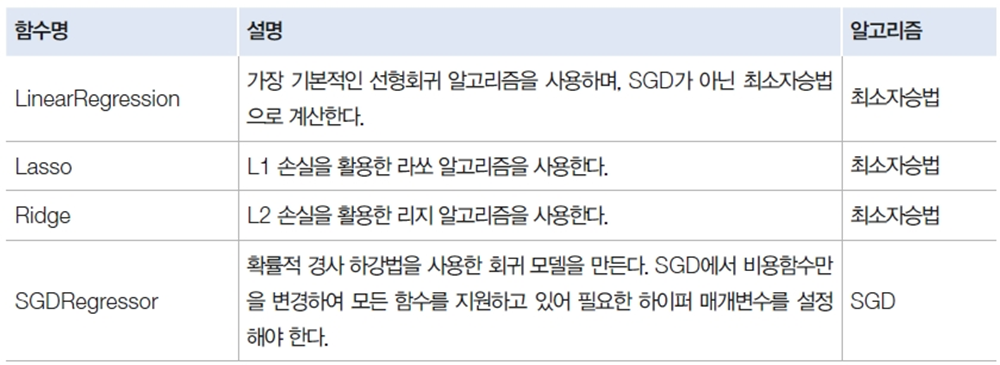

Boston Dataset
http://lib.stat.cmu.edu/datasets/boston

1978년에 보스턴 지역의 집값을 사용하여, 주택의 영향 요소들을 추출한 데이터

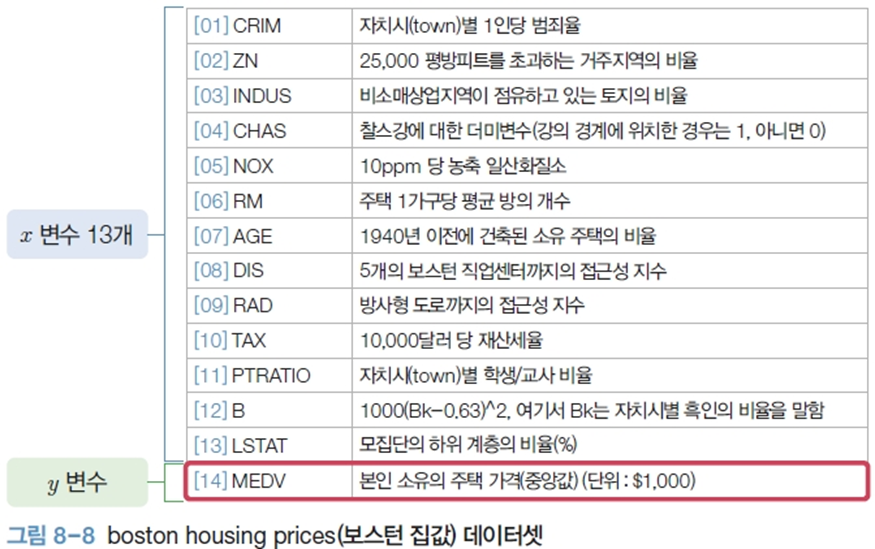

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml

boston_dataset = fetch_openml(name='boston', parser='auto', version=1)
boston_dataset

{'data':         CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  \
 0    0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0   
 1    0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0   
 2    0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0   
 3    0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0   
 4    0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0   
 ..       ...   ...    ...  ...    ...    ...   ...     ...  ..    ...   
 501  0.06263   0.0  11.93    0  0.573  6.593  69.1  2.4786   1  273.0   
 502  0.04527   0.0  11.93    0  0.573  6.120  76.7  2.2875   1  273.0   
 503  0.06076   0.0  11.93    0  0.573  6.976  91.0  2.1675   1  273.0   
 504  0.10959   0.0  11.93    0  0.573  6.794  89.3  2.3889   1  273.0   
 505  0.04741   0.0  11.93    0  0.573  6.030  80.8  2.5050   1  273.0   
 
      PTRATIO       B  LSTAT  
 0       15.3  396.90   4.98  
 1       17.8  396.90   9.14  
 2       

In [2]:
boston_dataset.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
boston_dataset["data"] # 다양한 변인들

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [4]:
boston_dataset["target"] # 주택 가격

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [5]:
x_data = boston_dataset["data"]
y_data = boston_dataset["target"]

**데이터 전처리 (Scaling)** with sklearn
- preprocessing.**StandardScaler** - Standardize features by removing the mean and scaling to unit variance.
- preprocessing.**MaxAbsScaler** - Scale each feature by its maximum absolute value.
- preprocessing.**MinMaxScaler** -  Transform features by scaling each feature to a given range.

In [6]:
from sklearn import preprocessing

minmax_scale = preprocessing.MinMaxScaler()
minmax_scale.fit(x_data)

minmax_scale.data_min_, minmax_scale.data_max_

(array([6.3200e-03, 0.0000e+00, 4.6000e-01, 0.0000e+00, 3.8500e-01,
        3.5610e+00, 2.9000e+00, 1.1296e+00, 1.0000e+00, 1.8700e+02,
        1.2600e+01, 3.2000e-01, 1.7300e+00]),
 array([ 88.9762, 100.    ,  27.74  ,   1.    ,   0.871 ,   8.78  ,
        100.    ,  12.1265,  24.    , 711.    ,  22.    , 396.9   ,
         37.97  ]))

In [7]:
x_scaled_data = minmax_scale.transform(x_data) # (2)

x_data[:5], x_scaled_data[:5]

(      CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  PTRATIO  \
 0  0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0     15.3   
 1  0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0     17.8   
 2  0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0     17.8   
 3  0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0     18.7   
 4  0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0     18.7   
 
         B  LSTAT  
 0  396.90   4.98  
 1  396.90   9.14  
 2  392.83   4.03  
 3  394.63   2.94  
 4  396.90   5.33  ,
 array([[0.00000000e+00, 1.80000000e-01, 6.78152493e-02, 0.00000000e+00,
         3.14814815e-01, 5.77505269e-01, 6.41606591e-01, 2.69203139e-01,
         0.00000000e+00, 2.08015267e-01, 2.87234043e-01, 1.00000000e+00,
         8.96799117e-02],
        [2.35922539e-04, 0.00000000e+00, 2.42302053e-01, 0.00000000e+00,
         1.72839506e-01, 5.47997701e-01, 7.82698249e-01, 3.48961980e-01,


**데이터를 훈련과 시험 데이터로 분류**

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_scaled_data, y_data, test_size=0.33)

X_train.shape, X_test.shape, y_train.shape, y_test.shape
# ((339, 13), (167, 13), (339, 1), (167, 1))

((339, 13), (167, 13), (339,), (167,))

- **fit_intercept** : 절편을 사용할지 말지를 선택
- **copy_X** : 학습 시 데이터를 복사한 후 학습을 할지 결정
- **n_jobs** : 연산을 위해 몇 개의 CPU를 사용할지 결정


In [9]:
from sklearn import  linear_model

regr = linear_model.LinearRegression(fit_intercept=True, copy_X=True, n_jobs=8)

- **alpha** : 라쏘 회귀, 리지 회귀, SGD에 있음. 페널티 값을 지정

In [10]:
lasso_regr = linear_model.Lasso(alpha=0.01, fit_intercept=True, copy_X=True)
ridge_regr = linear_model.Ridge(alpha=0.01, fit_intercept=True, copy_X=True)



경사하강법 (SGD)을 이용할 때 필요한 파라메터
- **max_inter** : 최대 한복 횟수
- **tol** : 더 이상 비용이 줄어들지 않을때 반복이 멈추는 값
- **eta0** : 학습률

In [11]:
SGD__regr = linear_model.SGDRegressor(penalty="l2", alpha=0.01, max_iter=1000, tol=0.001, eta0=0.01)

In [12]:
regr.fit(X_train, y_train)

LinearRegression(n_jobs=8)

In [13]:
lasso_regr.fit(X_train, y_train)
ridge_regr.fit(X_train, y_train)
SGD__regr.fit(X_train, y_train)

SGDRegressor(alpha=0.01)

In [14]:
print('Coefficients: ', regr.coef_)
print('intercept: ', regr.intercept_)

Coefficients:  [ -9.33967733   3.77095763   0.88431212   3.91856169  -6.63975575
  26.07682533  -2.00944861 -16.42160579   4.19889833  -5.44821419
  -7.36989727   3.63508339 -17.11318059]
intercept:  22.895910035405294


In [15]:
x_data[:5].to_numpy(dtype=np.float32)

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00],
       [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9690e+02, 5.3300e+00]], dtype=float32)

- 만들어진 함수 (Linear Regressor)로 예측을 함

In [16]:
regr.predict(x_data[:5].to_numpy())

array([-301.23156773, -201.79915348,  -73.4545235 ,   61.85847039,
         15.87310738])

- 실제 수식을 그대로 재현해서 선형 결합을 만들어서 확인해봐도 동일한 결과가 나오는 것을 확인 가능

In [17]:
x_data[:5].to_numpy(dtype=np.float32) @ regr.coef_.T + regr.intercept_

array([-301.23159297, -201.79918118,  -73.45457099,   61.85848573,
         15.87307397])

**회귀 문제의 성능 지표를 통해서 결과를 평가**

In [18]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

y_true = y_test.copy()
y_hat = regr.predict(X_test)

r2_score(y_true, y_hat), mean_absolute_error(y_true, y_hat), mean_squared_error(y_true, y_hat, squared=True)

(0.6521217761453972, 3.5012084618427335, 28.806261580544557)

- 예측한 결과와 실제 답을 X-Y로 출력했을 때, 만약 두 값이 같다면 점이 y=x 그래프 위에 있음
- 실제 답과, 예측한 답이 서로 선형적인 관계에 있음을 보여줌 (대체로 잘 예측함)

Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

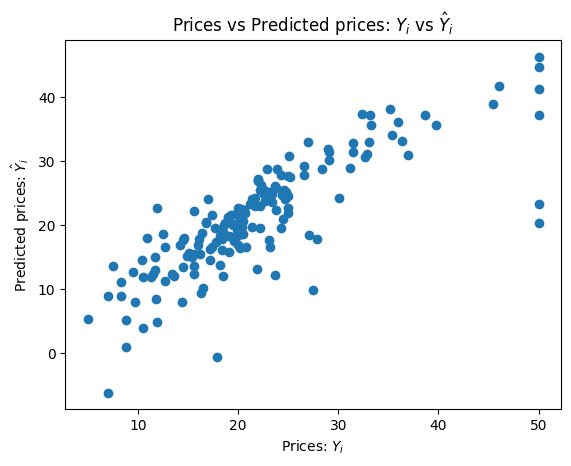

In [19]:
plt.scatter(y_true, y_hat)

plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

**분류문제 (또는 로지스틱 회귀)의 성능지표**

- Confusion Matrix

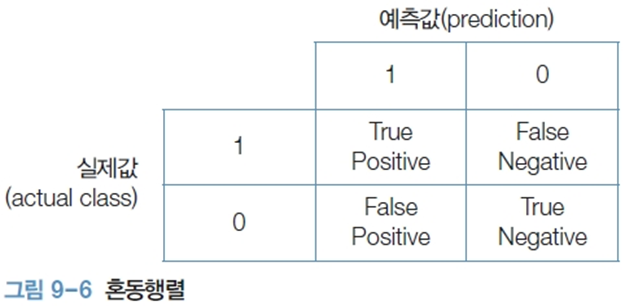

In [20]:
from sklearn.metrics import confusion_matrix
y_true = [1, 0, 1, 1, 0, 1]
y_pred = [0, 0, 1, 1, 0, 1]
confusion_matrix(y_true, y_pred)

array([[2, 0],
       [1, 3]])

- Confusion Matrix Class의 ravel함수는 Confusion Matrix를 분해해서 TN, FP, FN, TP를 구해준다.

In [21]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
(tn, fp, fn, tp)

(2, 0, 1, 3)

- **정확도(accuracy)** : 전체 데이터 개수 대비 정답을 맞춘 데이터의 개수

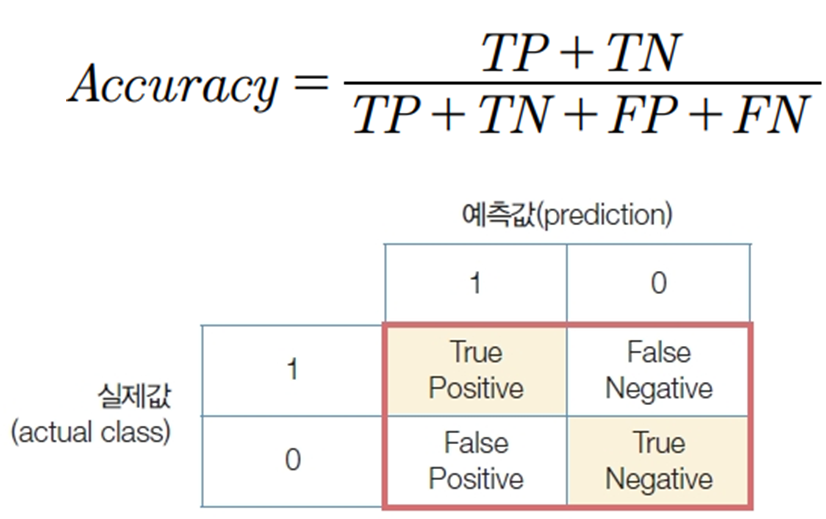

In [22]:
import numpy as np

sum(np.array(y_true) == np.array(y_pred)) / len(y_true)

0.8333333333333334

In [23]:
(tp+tn) / (tp+tn+fp+fn)

0.8333333333333334

In [24]:
from sklearn.metrics import accuracy_score

accuracy_score(y_true, y_pred)

0.8333333333333334

- **정밀도(precision)** : 인공지능 모델이 1이라고 예측했을 때 얼마나 잘 맞을지에 대한 비율

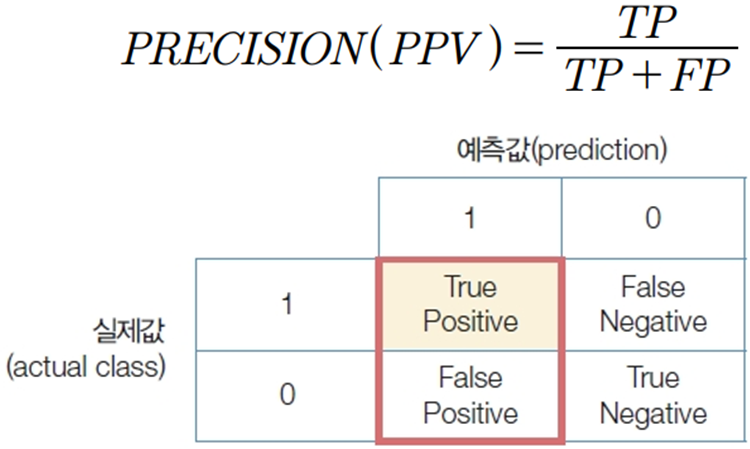

In [25]:
tp / (tp+fp)

1.0

In [26]:
from sklearn.metrics import precision_score

precision = precision_score(y_true, y_pred)
precision

1.0

- **민감도(recall)** : 실제 1인 값을 가진 데이터를 모델이 얼마나 1이라고 잘 예측했는지에 대한 비율

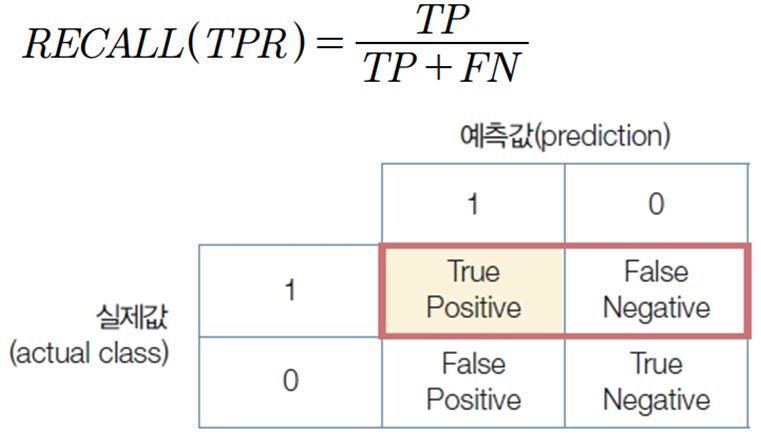

In [27]:
tp / (tp+fn)

0.75

In [28]:
from sklearn.metrics import recall_score

recall = recall_score(y_true, y_pred)
recall

0.75

- **스코어(F1 score)** : 정밀도(precision)와 민감도(recall)의 조화평균 값

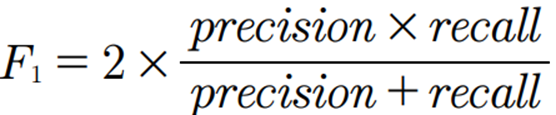

In [29]:
2 * (precision*recall) / (precision+recall)

0.8571428571428571

In [30]:
from sklearn.metrics import f1_score

f1_score(y_true, y_pred)

0.8571428571428571